<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 4:- Multi-layer Perceptron Neural Network</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

<h3> Importing Dataset</h3>

In [ ]:
#Importing library
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
!pip install keras==2.3.0
from keras.optimizers import SGD
from keras import regularizers
from keras.regularizers import l2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

<h3> Importing Dataset</h3>

In [ ]:
#Importing the Dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train =X_train / 255.0
X_test = X_test / 255.0

<h3>Data Partioning</h3>

In [ ]:
#Dividing the dataset
X_test = X_train[-10000:]
y_test = y_train[-10000:]
X_train = X_train[:X_train.shape[0]-10000]
y_train = y_train[:y_train.shape[0]-10000]

<h3> Data Preprocessing</h3>

In [ ]:
#Seperating the dataset into group of 100 belongs to each class
data = {}

for i in range(10):
    data[i] = list()

for i in range(len(X_train)):
    data[y_train[i]].append(X_train[i])

train_x = list()
train_y = list()

for i in range(len(data)):
    for j in range(100):
        train_x.append(data[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
train_y = np_utils.to_categorical(train_y)
y_test= np_utils.to_categorical(y_test)

<h3> Model Define</h3>

In [ ]:
learning_rate=[]
class LearningSpeed(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        optimizer = self.model.optimizer
        Intial_rate =tf.cast(optimizer.lr, tf.float32)
        Decay= 0.01
        iterations= tf.cast(optimizer.iterations, tf.float32)
        Intial_rate = (Intial_rate / (1. + Decay * iterations))
        learning_rate.append(tf.keras.backend.eval(Intial_rate))

In [ ]:
#Defining the Model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])
callbacks_list=[LearningSpeed()]
history=model.fit(train_x, train_y, validation_data=(X_test, y_test), epochs=30, batch_size=10,callbacks=callbacks_list, verbose = 0)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_18 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [ ]:
#Accuracy Calculation
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc*100)

10000/10000 [==============================] - 0s 25us/step
10.090000182390213


<h3>Plot between Training loss vs epoch</h3>

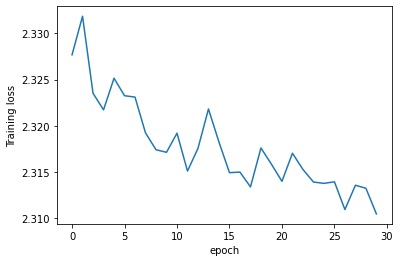

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()


<h3>Plot between Validation loss vs epoch</h3>

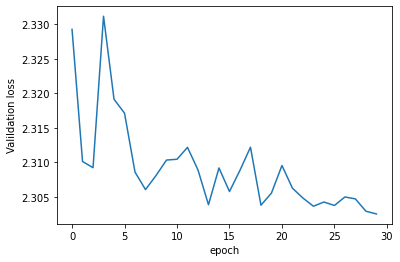

In [ ]:
#Plot between Validation loss vs epoch
plt.plot(history.history['val_loss'])
plt.ylabel('Valildation loss')
plt.xlabel('epoch')
plt.show()

<h3>Plot between Training loss vs Validation Loss</h3>

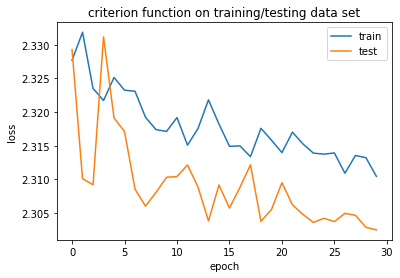

In [ ]:
#Plot of Training loss vs Validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('criterion function on training/testing data set')
plt.show()

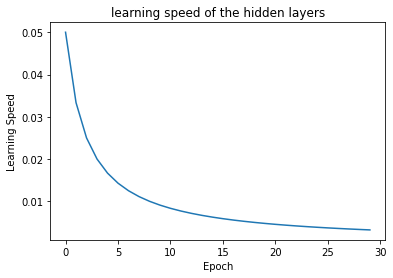

In [ ]:
#Plot of Learning rate
plt.xlabel('Epoch')
plt.ylabel('Learning Speed')
plt.title('learning speed of the hidden layers')
plt.plot(learning_rate)
plt.show()

<h3> Calculation of Training and Testing Error</h3>

In [ ]:
Training_error=(history.history['accuracy'])
Validation_error=(history.history['val_accuracy'])
for i in range(len(Training_error)):
  Training_error[i]= 1- Training_error[i]
for i in range(len(Validation_error)):
  Validation_error[i]= 1- Validation_error[i]


<h3>Plot of Training error</h3>

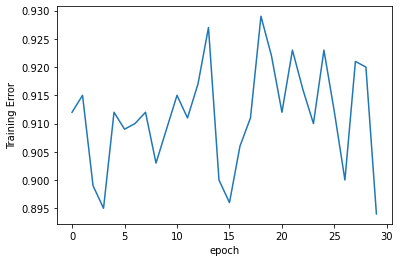

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Training_error)
plt.ylabel('Training Error')
plt.xlabel('epoch')
plt.show()

<h3>Plot of Testing Error</h3>

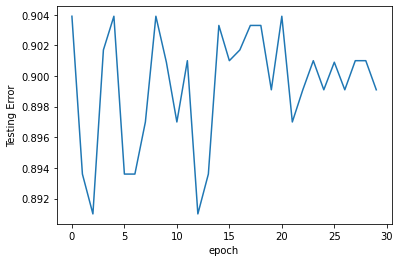

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Validation_error)
plt.ylabel('Testing Error')
plt.xlabel('epoch')
plt.show()